# Part 1

Python Coding and Data Set

    Load in the data file and header file provided
    The dataframe does not currently have a header, load in the header file and attach it to the dataframe
    Comment on any steps you might take to evaluate or transform the dataset.
    Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ?
    Explain how you would identify this.
    Write a function to generate bootstrap samples of the data.

Exploratory Analysis

    Identify 2-3 variables that are predictive of a malignant tumor.
    Display the relationship visually and write 1-2 sentences explaining the relationship.

Modeling

    Build a model to predict the malignant tumors.
    Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
    Identify how you would control for overfitting in each classification technique.
    Evaluate the performance of each model.
    In each model, identify the most important predictive variables and explain how you identified them.

Explanation

    To Technical Audiences
    Explain the limitations of your analysis and identify possible further steps you could take.
    To Non-Technical Audiences
    Write a short summary of your analysis, explaining how your model works and how it performs.
    Briefly explain the factors that contributed to malignant vs benign tumor identification.

In [1]:
# Load the used libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import cross_validation, datasets, grid_search, neighbors, metrics
%matplotlib inline
import statsmodels.api as sm
import operator

In [2]:
# Read in the files and add the header to the data frame
col_names = open('field_names.txt')
df = pd.read_csv('breast-cancer.csv',header=None)
df.columns = [name[:-1] for name in col_names]

In [3]:
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_wors
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Determine how many patients had malign breast cancer cells
print df['diagnosis'].unique()
print len(df[df['diagnosis'] == 'M'])
print len(df[df['diagnosis'] != 'M'])

['M' 'B']
212
357


In [5]:
# Code malignity by numeric value in a new variable diag_dummy
df['diag_dummy'] = (df['diagnosis'] != 'M' )*1

In [6]:
# Create a summary of the dataset
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_wors,diag_dummy
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Mean and median smoothness and compactness for benign and malignant tumors

Now we calculate the mean, median and standard deviation for the mean smoothness and the mean compactness.

In [7]:
print 'Malign'
print 'Mean:', df.smoothness_mean[df.diagnosis == 'M'].mean(), 'Median:', df.smoothness_mean[df.diagnosis == 'M'].median(), 'Standard deviation:',df.smoothness_mean[df.diagnosis == 'M'].std()
print 'Benign'
print 'Mean:', df.smoothness_mean[df.diagnosis != 'M'].mean(), 'Median:', df.smoothness_mean[df.diagnosis != 'M'].median(), 'Standard Deviation', df.smoothness_mean[df.diagnosis != 'M'].std()

Malign
Mean: 4.32392924528 Median: 3.6795 Standard deviation: 2.56854565405
Benign
Mean: 2.00032128852 Median: 1.851 Standard Deviation 0.77116920271


In [8]:
print 'Malign'
print 'Mean:', df.compactness_mean[df.diagnosis == 'M'].mean(), 'Median:', df.compactness_mean[df.diagnosis == 'M'].median(), 'Standard Deviation:', df.compactness_mean[df.diagnosis == 'M'].std()
print 'Benign'
print 'Mean', df.compactness_mean[df.diagnosis != 'M'].mean(), 'Median:', df.compactness_mean[df.diagnosis != 'M'].median(),  'Standard Deviation:', df.compactness_mean[df.diagnosis != 'M'].std()

Malign
Mean: 0.0322811650943 Median: 0.02859 Standard Deviation: 0.018387189921
Benign
Mean 0.0214382464986 Median: 0.01631 Standard Deviation: 0.0163515113604


The mean and median values for the smoothness mean seem to indicate a separation between malign and benign cells. The large standard deviation for malign cells and the low standard deviation for benign cells could indicate that discrimination on this feature could result in low false negative rates but higher false positive rates.

For the compactness mean, mean and median are closer and the standard deviations are of a similar level, so this feature might be a less good indicator.

# Create a function for bootstrapping the dataset

In [9]:
def df_bootstrap(df):
    randlist = pd.DataFrame(index=np.random.randint(len(df), size=len(df)))
    df_sample =  df.merge(randlist, left_index=True, right_index=True, how='right')
    return df_sample 

In [10]:
# Create a bootstrap sample
df_sample = df_bootstrap(df)
df_sample.shape, df_sample.ID.unique().shape

((569, 33), (355,))

As expected, the bootstrapped sample contains about 2/3 different items from the original dataset.

# Exploratory data anlysis

We display the variables concave_points_worst, concave_points_sd_error and perimeter_sd_error as predictors for malignity. Though there are no clear boundaries, there are values at the upper and lower ends which allow a clear discrimination between malign and benign cancer.

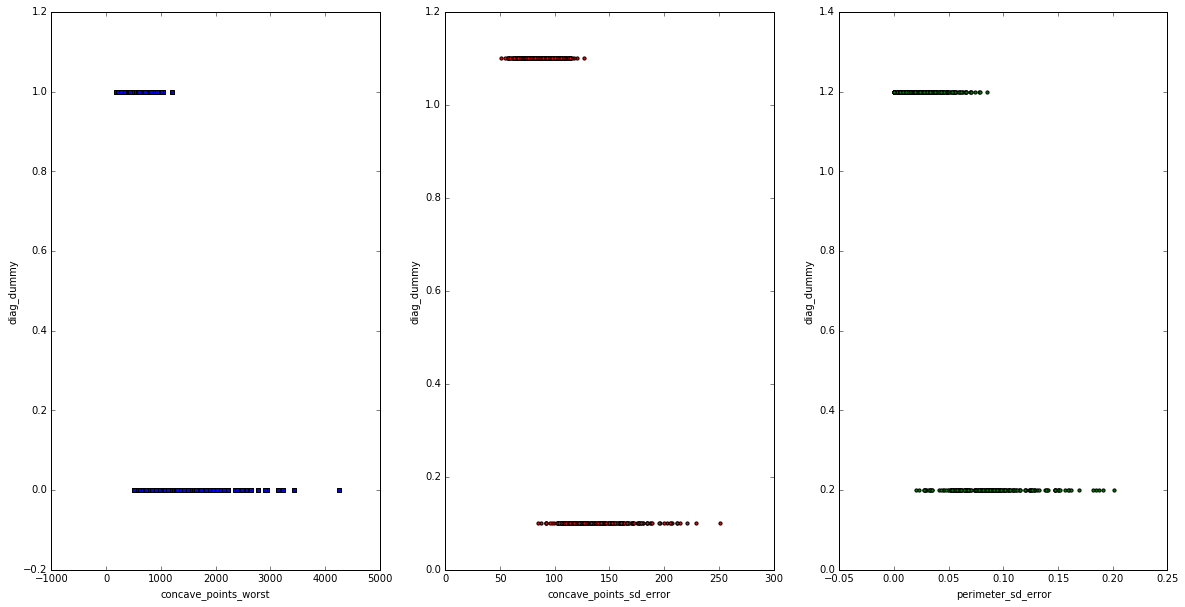

In [11]:
names = ['concave_points_worst','concave_points_sd_error','perimeter_sd_error','diag_dummy']
#names = ['perimeter_sd_error','smoothness_worst','area_mean','diag_dummy']
x0 = df[[names[0]]]
x1 = df[[names[1]]]
x2 = df[[names[2]]]
y0 = df[[names[3]]]

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(131)
ax1 = plt.scatter(x0,y0, s=10, c='b', marker="s")
plt.xlabel(names[0])
plt.ylabel(names[3])

ax2 = fig.add_subplot(132)
ax2 = plt.scatter(x1,y0+0.1, s=10, c='r', marker="o")
plt.xlabel(names[1])
plt.ylabel(names[3])

ax3 = fig.add_subplot(133)
ax3 = plt.scatter(x2,y0+0.2, s=10, c='g', marker="o")
plt.xlabel(names[2])
plt.ylabel(names[3])

plt.show()

# Modelling

First we collect our features and response.

In [12]:
# Create a copy of the dataset and drop the variables which do not serve as predictors
X = df.copy()
X.drop(['ID','diagnosis','diag_dummy'],axis=1,inplace=True)
# Determine the response variable
y = df.diag_dummy

# K nearest neighbours

As a first method we use k nearest neighbours.
As the following shows, accuracy beyond 0.9 can be reached depending of the number of nearest neighbours.

In [13]:
for nn in range(2,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=nn,weights='uniform')#(n_neighbors=5, weights='uniform')
    knn.fit(X, y)
    print "Neighbours = ", nn, ',', "Accuracy = ", knn.score(X, y)

Neighbours =  2 , Accuracy =  0.968365553603
Neighbours =  3 , Accuracy =  0.956063268893
Neighbours =  4 , Accuracy =  0.947275922671
Neighbours =  5 , Accuracy =  0.947275922671
Neighbours =  6 , Accuracy =  0.942003514938
Neighbours =  7 , Accuracy =  0.943760984183
Neighbours =  8 , Accuracy =  0.93848857645
Neighbours =  9 , Accuracy =  0.942003514938


To avoid overfitting, we use five-fold cross validation. The resulting scores for the lowest numbers of neighbours are shown below.

In [14]:
k = range(2, 100)
params = {'n_neighbors': k}
np.random.seed(1)
kf = cross_validation.KFold(len(X), n_folds = 5, shuffle=True)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(weights='uniform'),
    param_grid=params,
    cv=kf,
)
gs.fit(X, y)
gs.grid_scores_[0:20]

[mean: 0.90685, std: 0.02507, params: {'n_neighbors': 2},
 mean: 0.92267, std: 0.02027, params: {'n_neighbors': 3},
 mean: 0.91564, std: 0.02249, params: {'n_neighbors': 4},
 mean: 0.92267, std: 0.02901, params: {'n_neighbors': 5},
 mean: 0.92619, std: 0.02860, params: {'n_neighbors': 6},
 mean: 0.92267, std: 0.02381, params: {'n_neighbors': 7},
 mean: 0.92619, std: 0.03017, params: {'n_neighbors': 8},
 mean: 0.92619, std: 0.01723, params: {'n_neighbors': 9},
 mean: 0.92794, std: 0.02104, params: {'n_neighbors': 10},
 mean: 0.93146, std: 0.01955, params: {'n_neighbors': 11},
 mean: 0.93146, std: 0.01955, params: {'n_neighbors': 12},
 mean: 0.92794, std: 0.01700, params: {'n_neighbors': 13},
 mean: 0.92619, std: 0.01967, params: {'n_neighbors': 14},
 mean: 0.92794, std: 0.01508, params: {'n_neighbors': 15},
 mean: 0.92970, std: 0.01755, params: {'n_neighbors': 16},
 mean: 0.92443, std: 0.01630, params: {'n_neighbors': 17},
 mean: 0.92619, std: 0.01534, params: {'n_neighbors': 18},
 mean

The plot shows the accuracy reached in dependence of the number of neighbours. The highest accuracy is reached for k=11.

(0.90333919156414766, 1)

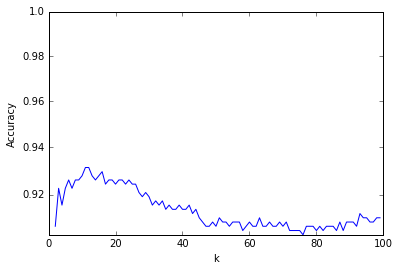

In [15]:
plt.plot(k, [s[1] for s in  gs.grid_scores_])
plt.yscale('log')
plt.yticks([0.90,0.92,0.94,0.96,0.98,1.0],['0.90','0.92','0.94','0.96','0.98','1.0'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Logistic regression

Determine the AUC scores for a logistic regression fit on any of the predictors

In [16]:
lr = LogisticRegression()
dict = {}
for name in X.columns:
    Z = df[[name]]

    lr.fit(Z, y)

    predictions = lr.predict(Z)
    probabilities = lr.predict_proba(Z)
    dict[name] = roc_auc_score(df[['diag_dummy']], lr.predict(Z))

print 'Sorted AUC scores for all single predictor models'
sorted(dict.items(), key=operator.itemgetter(1))

Sorted AUC scores for all single predictor models


[('compactness_sd_error', 0.49859943977591037),
 ('concavity_mean', 0.5),
 ('compactness_worst', 0.5),
 ('perimeter_worst', 0.5),
 ('area_worst', 0.5),
 ('fractal_dimension_wors', 0.5),
 ('compactness_mean', 0.5),
 ('smoothness_worst', 0.5),
 ('symmetry_mean', 0.5),
 ('area_mean', 0.5),
 ('concavity_sd_error', 0.5),
 ('texture_sd_error', 0.5),
 ('fractal_dimension_sd_error', 0.55851963426880191),
 ('perimeter_sd_error', 0.570754716981132),
 ('texture_worst', 0.58873738174515089),
 ('radius_sd_error', 0.62749722530521646),
 ('concave_points_mean', 0.67378177686168805),
 ('perimeter_mean', 0.72840362560118388),
 ('symmetry_sd_error', 0.74048676074203268),
 ('area_sd_error', 0.75220654299455625),
 ('smoothness_mean', 0.75758416574176846),
 ('fractal_dimension_mean', 0.77925981713440096),
 ('symmetry_worst', 0.80740975635537238),
 ('smoothness_sd_error', 0.84035595370223559),
 ('radius_mean', 0.8572353469689763),
 ('radius_worst', 0.86055176787696219),
 ('texture_mean', 0.86526874900903761

In [17]:
# The best single predictor model 
Z = df[['concave_points_sd_error']]
lr.fit(Z, y)
            
predictions = lr.predict(Z)            
probabilities = lr.predict_proba(Z)
print roc_auc_score(df[['diag_dummy']], lr.predict(Z))
pd.crosstab(df.diag_dummy, predictions, rownames=['diag_dummy'],colnames=['predicted'])

0.903004598066


predicted,0,1
diag_dummy,,
0,178,34
1,12,345


The best single predictor model uses the SD error of concave points and reaches an AUC score above 0.9 and the confusion matrix as given above.

# Two predictor model

In [18]:
lr = LogisticRegression()
dict = {}
for name in X.columns:
    for name1 in X.columns:
        if name1 != name:
            Z = df[[name]]

            lr.fit(Z, y)

            predictions = lr.predict(Z)
            probabilities = lr.predict_proba(Z)
#    print 'Roc-AUC-score:', name, ':', roc_auc_score(df[['diag_dummy']], lr.predict(Z))
            dict[(name,name1)] = roc_auc_score(df[['diag_dummy']], lr.predict(Z))
        else:
            continue
print 'Sorted AUC scores for the ten best two predictor models'
sorted(dict.items(), key=operator.itemgetter(1))[-10:]

Sorted AUC scores for the ten best two predictor models


[(('concave_points_sd_error', 'concavity_worst'), 0.90300459806564137),
 (('concave_points_sd_error', 'texture_worst'), 0.90300459806564137),
 (('concave_points_sd_error', 'perimeter_worst'), 0.90300459806564137),
 (('concave_points_sd_error', 'perimeter_sd_error'), 0.90300459806564137),
 (('concave_points_sd_error', 'fractal_dimension_wors'), 0.90300459806564137),
 (('concave_points_sd_error', 'area_mean'), 0.90300459806564137),
 (('concave_points_sd_error', 'concave_points_mean'), 0.90300459806564137),
 (('concave_points_sd_error', 'symmetry_worst'), 0.90300459806564137),
 (('concave_points_sd_error', 'compactness_mean'), 0.90300459806564137),
 (('concave_points_sd_error', 'perimeter_mean'), 0.90300459806564137)]

There are several two predictor models which reach the same AUC score above 0.9. Adding a second predictor does not lead to a real improvement in comparison to the single predictor model. We take a further look at the one containing 
the sd error of concave points and the sd error of the perimeter.

In [19]:
names = ['concave_points_sd_error','perimeter_sd_error']
Z = df[[names[0],names[1]]]
lr.fit(Z, y)
            
predictions = lr.predict(Z)            
probabilities = lr.predict_proba(Z)
print roc_auc_score(df[['diag_dummy']], lr.predict(Z))
pd.crosstab(df.diag_dummy, predictions, rownames=['diag_dummy'],colnames=['predicted'])

0.9006461075


predicted,0,1
diag_dummy,,
0,177,35
1,12,345


The model reaches an AUC score of 0.9 and the confusion matrix as given above.
Now we compare the predicted probability for malignity with the true values.

In [20]:
exp0 = np.exp(lr.intercept_[0]+lr.coef_[0,0]*np.array(Z[[names[0]]])+0*lr.coef_[0,1]*np.array(Z[[names[1]]]))
exp1 = np.exp(lr.intercept_[0]+0*lr.coef_[0,0]*np.array(Z[[names[0]]])+lr.coef_[0,1]*np.array(Z[[names[1]]]))
my_array0 = np.arange(0,300,0.001)
my_array1 = np.arange(0,0.2,0.001)
exp2 = np.exp(lr.intercept_[0]+1*lr.coef_[0,0]*my_array0+0*lr.coef_[0,1]*my_array0)
exp3 = np.exp(lr.intercept_[0]+0*lr.coef_[0,0]*my_array1+1*lr.coef_[0,1]*my_array1)

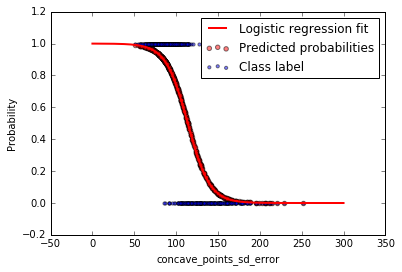

In [21]:
plt.scatter(Z[[names[0]]],exp0/(1+exp0),c='r',alpha=0.5)
plt.scatter(Z[[names[0]]],y, s=10, c='b', marker="o",alpha=0.5)
plt.plot(my_array0,exp2/(1+exp2),c='r',linewidth=2.0)
plt.xlabel(names[0])
plt.ylabel('Probability')
plt.legend(['Logistic regression fit','Predicted probabilities','Class label'],loc='upper right')

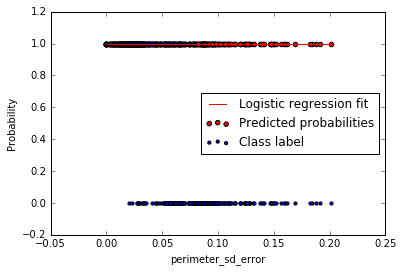

In [22]:
plt.scatter(Z[[names[1]]],exp1/(1+exp1),c='r')
plt.scatter(Z[[names[1]]],y, s=10, c='b', marker="o")
plt.plot(my_array1,exp3/(1+exp3),c='r')
plt.xlabel(names[1])
plt.ylabel('Probability')
plt.legend(['Logistic regression fit','Predicted probabilities','Class label'],loc='center right')

In the plots for both parameters, the blue points indicate malign or benign breast cancer, and in red are the predicted probalities for corresponding parameter values indicating malignity. The corresponding ROC curve is plotted below. A value for the concave points sd error below 100 makes malign cancer very likely, whereas values above 160 indicate benign cells. Inbetween the prediction depends on the threshold value. The perimeter sd value alone instead does not seem to be a very good discriminator.

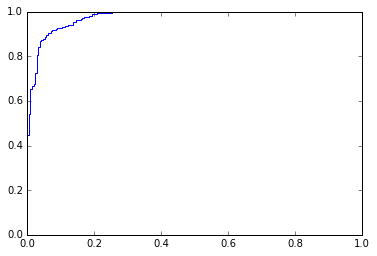

In [23]:
plt.plot(roc_curve(df[['diag_dummy']], probabilities[:,1])[0],
         roc_curve(df[['diag_dummy']], probabilities[:,1])[1])

# Logistic regression on all features

Performing a logistic regression on all given features, we reach an accuracy above 0.95. The corresponding ROC curve and confusion matrix are given below.

0.954376090059


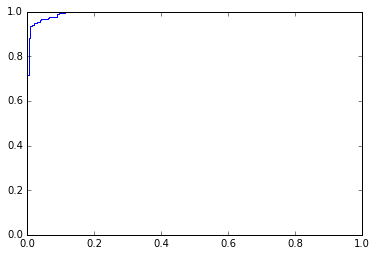

In [24]:
lr = LogisticRegression()

lr.fit(X, y)

predictions = lr.predict(X)
probabilities = lr.predict_proba(X)
print roc_auc_score(df[['diag_dummy']], lr.predict(X))
plt.plot(roc_curve(df[['diag_dummy']], probabilities[:,1])[0],
         roc_curve(df[['diag_dummy']], probabilities[:,1])[1])

In [25]:
pd.crosstab(df.diag_dummy, predictions, rownames=['diag_dummy'],colnames=['predicted'])

predicted,0,1
diag_dummy,,
0,198,14
1,9,348


Now we apply five-fold cross validation to reduce overfitting in combination with a grid search on shrinking parameters and varying class weights.

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.959608371651


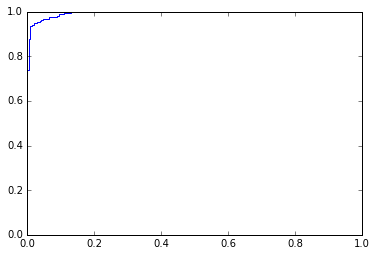

In [26]:
from sklearn import grid_search, cross_validation

# Use GridSearch to try different params for LogisticRegression
# with cross validation to examine the test set accuracy
# and AUC as the performance score
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)],
                'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(df), n_folds=5),
    scoring='roc_auc'
)

gs.fit(X, y)
print gs.best_estimator_

predictions_best = gs.best_estimator_.predict(X)
probabilities_best = gs.best_estimator_.predict_proba(X)
print roc_auc_score(df[['diag_dummy']], predictions_best)
plt.plot(roc_curve(df[['diag_dummy']], probabilities_best[:,1])[0],
         roc_curve(df[['diag_dummy']], probabilities_best[:,1])[1])

In [27]:
pd.crosstab(df.diag_dummy, predictions_best, rownames=['diag_dummy'],colnames=['predicted'])

predicted,0,1
diag_dummy,,
0,202,10
1,12,345


The cross validation leads to a little improvement of the AUC score to 0.96.

# Random Forest Classifier

To improve on the logistic regression model, we use now a random forest classifier. One of the advantages of this method is that it will allow to easily determine the most important features.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [29]:
model = RandomForestClassifier(n_estimators = 30)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
# Extracting importance of features
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values(by='Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
23,concave_points_worst,0.166030
27,fractal_dimension_mean,0.132421
22,concave_points_sd_error,0.126067
20,concavity_worst,0.115915
7,perimeter_sd_error,0.093545
6,perimeter_mean,0.059246
3,texture_mean,0.047213
2,radius_worst,0.038298
26,symmetry_worst,0.031584
0,radius_mean,0.027344


The above list gives the importance scores for the different features according to the random forest classifier. The parameters of the two parameter logistic regression are among the top three.
Now we use five-fold cross validation to determine the accuracy of the model calculating the corresponding AUC scores and averaging over all cross validation sets. We repeat the same procedure for different numbers of trees, increasing the number of trees leads to bias reduction.
We limit the maximal depth of the trees and the minimal number of data points in every leaf.

In [31]:
# Now evaluate the random forest model using cross-validation.

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print "Average AUC:", scores.mean()
print

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = 20,max_depth=10,min_samples_leaf=5)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=10)
    #print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))
    print('n trees: {}, Average AUC {}'.format(n_trees, scores.mean()))

Average AUC: 0.988323480937

n trees: 1, Average AUC 0.988099618635
n trees: 11, Average AUC 0.987861437504
n trees: 21, Average AUC 0.988158283515
n trees: 31, Average AUC 0.988846629561
n trees: 41, Average AUC 0.98918865526
n trees: 51, Average AUC 0.986369477084
n trees: 61, Average AUC 0.986549165121
n trees: 71, Average AUC 0.987853878925
n trees: 81, Average AUC 0.988529512815
n trees: 91, Average AUC 0.989384834742


In [32]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
predictions = model.predict(X)

0.975529834575


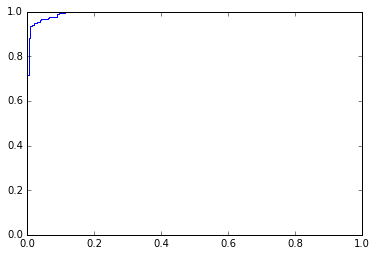

In [34]:
print roc_auc_score(df[['diag_dummy']], predictions)
plt.plot(roc_curve(df[['diag_dummy']], probabilities[:,1])[0],
         roc_curve(df[['diag_dummy']], probabilities[:,1])[1])

In [35]:
pd.crosstab(df.diag_dummy, predictions, rownames=['diag_dummy'],colnames=['predicted'])

predicted,0,1
diag_dummy,,
0,204,8
1,4,353


As we see, with the random forest classifier, we can reach AUC values of 0.99 after cross validation. The method therefore outperforms logistic regression.

# Explanation

Technical:

We used k-nearest-neighbours, logistic regression and random forest classifiers to determine the malignity of breast cancer cells. 
After cross validation, with k-nearest neighbours we reached an accuracy of 93 %, with logistic regression  of 96 % and with random forests even 99 % and hence a very satisfying level of accuracy. K-nearest neighbours does not allow a useful discrimination of the importance of the different features, but the other two methods give similar results on the importance of the different features, the sd error of concave points and the perimeter contributes in both cases importantly to the correct classification, the most important one for logistic regression is the sd error of concave points, whereas for the random forest classifier it is concave points worst. 
Further analyses could include a thorough best-subset analysis for the logistic regression model and, in the case of random forest, the dependence of the accuracy on the parameters like tree depth, maximal number of features and minimal number of leaf nodes.

Non-technical:

With a success rate of up to 99%, we can reliably classify the malignity of cancer cells using up to thirty measured variables. Even if we use only one feature, for example the sd error of concave points, we can reach an accuracy of 90%. For that feature, a value below 100 would be a sign of malign cancer.